In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [222]:
data = np.load('mnist.npz')

data.files # The list containing files

['X', 'y']

In [223]:
x = pd.DataFrame(data['X'])
y = pd.DataFrame(data['y'])

# Swapping columns and rows and creating dataset DataFrame
dataset = x.T

# Appending classes values to the dataset
dataset['number'] = y.T

dataset

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,number
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


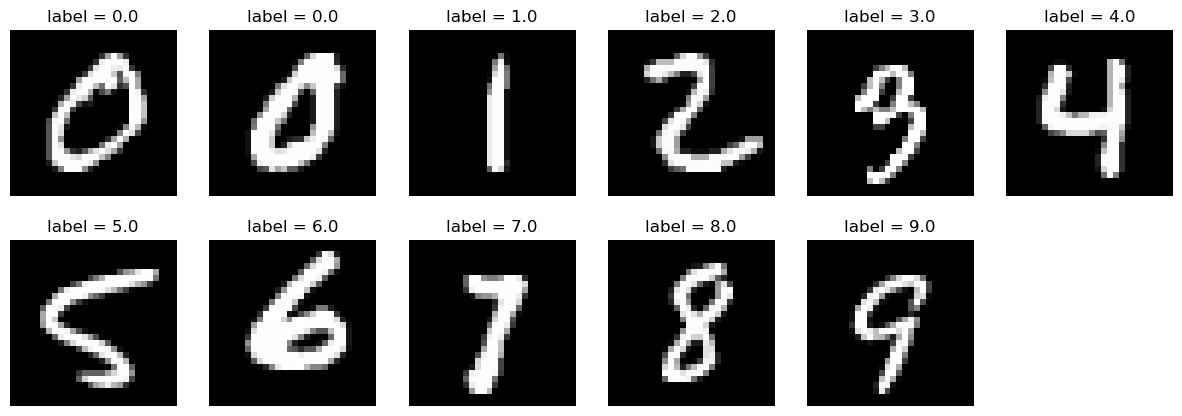

In [224]:
plt.figure(figsize=(15, 5))
classes = y.values[0]

j = 0
for i in range(0, 60001, 5900):
    plt.subplot(2, 6, j+1)
    j += 1
    plt.imshow(dataset.iloc[i, :-1].values.reshape(28, 28), cmap='gray')
    plt.title(f'label = {classes[i]}')
    plt.axis('off')

In [225]:
# Spliting datset into test and train dataframes
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], dataset['number'], test_size = 0.25, random_state=0)

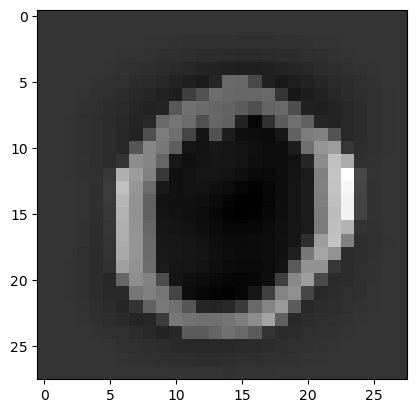

In [226]:
# Using scaler to fit and transform input data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.imshow(X_train_scaled[0].reshape((28, 28)), cmap='gray')

In [227]:
# Train the model and Classify data by using KNN

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [228]:
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

print('Accuracy on training set: ', accuracy_score(y_pred_train, y_train))
print('Accuracy on test set: ', accuracy_score(y_pred_test, y_test))

Accuracy on training set:  1.0
Accuracy on test set:  0.9430666666666667


In [229]:
k_pred = {}
k_values = [1, 3, 5, 7, 9, 11, 13] 

for k in k_values:

    # Instantiate the KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Predict class labels for train and test input
    y_pred_train = knn.predict(X_train_scaled)
    y_pred_test = knn.predict(X_test_scaled)
    
    # Store training accuracy score and test accuracy scores 
    k_pred[k] = [y_pred_train, y_pred_test]

k_pred

{1: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 4., 4., 9.])],
 3: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 4., 7., 9.])],
 5: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 2., 7., 9.])],
 7: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 2., 7., 9.])],
 9: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 2., 7., 9.])],
 11: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 2., 7., 9.])],
 13: [array([0., 5., 5., ..., 7., 7., 0.]),
  array([0., 3., 9., ..., 2., 7., 9.])]}

for k = 1:
Accuracy on training set:  1.0
Accuracy on test set:  0.9430666666666667 

for k = 3:
Accuracy on training set:  0.9707777777777777
Accuracy on test set:  0.9442666666666667 

for k = 5:
Accuracy on training set:  0.9620666666666666
Accuracy on test set:  0.9426 

for k = 7:
Accuracy on training set:  0.9568888888888889
Accuracy on test set:  0.9405333333333333 

for k = 9:
Accuracy on training set:  0.9525555555555556
Accuracy on test set:  0.9378666666666666 

for k = 11:
Accuracy on training set:  0.9485555555555556
Accuracy on test set:  0.9362666666666667 

for k = 13:
Accuracy on training set:  0.9453333333333334
Accuracy on test set:  0.9349333333333333 



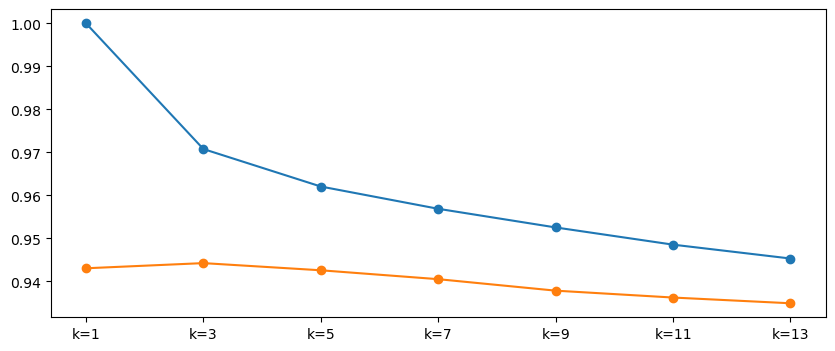

In [230]:
results = [] 

for k in k_values:
    
    train_accuracy = accuracy_score(k_pred[k][0], y_train) 
    test_accuracy = accuracy_score(k_pred[k][1], y_test)
    
    results.append([train_accuracy,test_accuracy])
    
    print(f'for k = {k}:')
    print('Accuracy on training set: ', train_accuracy)
    print('Accuracy on test set: ', test_accuracy, '\n')

fig = plt.figure(figsize=(10, 4))
plt.plot(results, marker='o')
plt.xticks(ticks=list(range(0, 7)), labels=['k=1', 'k=3', 'k=5', 'k=7', 'k=9', 'k=11', 'k=13'])
plt.show()

# K=3 has the best training and test score overall

In [231]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}, scoring='accuracy')

grid_search = grid.fit(X_train_scaled, y_train)

# GridSearchCV approves the best parameter that we found!

In [232]:
grid_search.best_params_

{'n_neighbors': 3}

# Choosing 0 & 1 as target labels

In [233]:
# Choosing two classes for binary classficiation with svm, 0 & 1
class_0_1 = pd.concat(
    [dataset.loc[dataset['number'] == 0.0], dataset.loc[dataset['number'] == 1.0]]
)

scaler = StandardScaler()

scaler.fit(class_0_1.iloc[:, :-1])

class_0_1_scaled_X = scaler.transform(class_0_1.iloc[:, :-1])

class_0_1_scaled_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [234]:
# Training the SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

'''
parameters = {
    'C': [0.1,1, 10],
    'gamma': [1,0.1,0.01],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}
'''

svc = SVC(C=0.1, gamma=1, kernel='linear')

svc.fit(class_0_1_scaled_X, class_0_1['number'])

SVC(C=0.1, gamma=1, kernel='linear')

In [235]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=5)

score = cross_val_score(svc, class_0_1_scaled_X, class_0_1['number'], cv=kf)

In [236]:
print(f"Mean validation score for 5 folds: {score.mean()}")

Mean validation score for 5 folds: 0.9980260560600079


In [237]:
# Training 45 different models for each pair of classes
datasets = {}
svc_models = {}

for i in range(0, 10):
    
    for j in range(i + 1, 10):
        
            datasets[f'class_{i}_{j}'] = pd.concat(
            [
                dataset.loc[dataset['number'] == float(i)],
                dataset.loc[dataset['number'] == float(j)]
            ]
        )

            scaler = StandardScaler()

            scaler.fit(datasets[f'class_{i}_{j}'].iloc[:, :-1])
            scaled_X = scaler.transform(datasets[f'class_{i}_{j}'].iloc[:, :-1])
            
            svc = SVC(C=0.1, gamma=1, kernel='linear')
            
            svc.fit(scaled_X, datasets[f'class_{i}_{j}']['number'])
            
            kf = KFold(n_splits=5)
            
            svc_models[f'class_{i}_{j}_model'] = {
                'model': svc,
                'mean_score': (cross_val_score(svc, scaled_X, datasets[f'class_{i}_{j}']['number'], cv=kf)).mean()
            }
        

# Classes 7 & 9 are the hardest clasess for classifer to classify

In [238]:
scores = []

for i in range(0, 10):
    for j in range(i+1, 10):
        
        scores.append(svc_models[f'class_{i}_{j}_model']['mean_score'])

# The model for 7 & 9 classes has the smallest score
min(scores) == svc_models['class_7_9_model']['mean_score']

True

In [239]:
from tqdm import tqdm 

model_pred = []

for i in tqdm(range(0, 9)):
    for j in range(i+1, 10):
        
        model = svc_models[f'class_{i}_{j}_model']['model']
        
        model_pred.append(model.predict(X_test_scaled).tolist())

model_pred = np.array(model_pred)

100%|██████████| 9/9 [00:40<00:00,  4.49s/it]


In [ ]:
"""
Counting the predection per each row in the test dataset
"""
from collections import Counter


final_pred = []

for i in range(15000):
    final_pred.append(Counter(model_pred[:, i]).most_common(1)[0][0])
    
final_pred = np.array(final_pred)

In [242]:
# The output of the model
final_pred

array([0., 3., 4., ..., 0., 7., 9.])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_train)

knn_pred= knn.predict(X_test_scaled)

In [241]:
print(f"The acuuracy of the best KNN model on the test dataset: {accuracy_score(knn_pred, y_test)}\n")
print(f"The acuuracy of the SVM model on the test dataset: {accuracy_score(final_pred, y_test)}\n")

The acuuracy of the best KNN model on the test dataset: 0.9442666666666667

The acuuracy of the SVM model on the test dataset: 0.9088

